## ALL MXNet Classifier

# Software

To use this project you will need to install the following software:

* MXNet
* Numpy
* Matplotlib
* Pathlib

# Import Modules

In [1]:
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

import mxnet as mx
from mxnet import gluon
from mxnet.gluon.data.vision import transforms

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pylab import imshow
%matplotlib inline

# Set Global Variables

In [4]:
batch_size = 2
jitter_param = 0.05
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_path = '../model/'
path = train_path + 'train/'

# Data

## ALL-IDB

You need to be granted access to use the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. You can find the application form and information about getting access to the dataset on [this page](https://homes.di.unimi.it/scotti/all/#download) as well as information on how to contribute back to the project [here](https://homes.di.unimi.it/scotti/all/results.php). If you are not able to obtain a copy of the dataset please feel free to try this tutorial on your own dataset, we would be very happy to find additional AML & ALL datasets.

## ALL_IDB1

In this project, [ALL-IDB1](https://homes.di.unimi.it/scotti/all/#datasets) is used, one of the datsets from the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. We will use data augmentation to increase the amount of training and testing data we have.

## Data Preprocessing 

For importing the data, ImageFolderDataset from Gluon module will be used.

In [5]:
train_dataset  = mx.gluon.data.vision.datasets.ImageFolderDataset(path)

Example of 0 class - existence of actual disease (ALL):

Data type: <class 'numpy.uint8'>
Label: 0
Label description: ALL


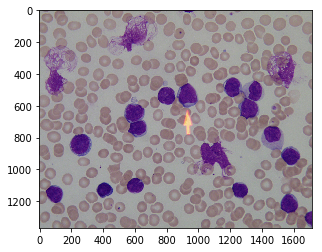

In [6]:
sample_idx = 10
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

imshow(data.asnumpy(), cmap='Blues')
print("Data type: {}".format(data.dtype))
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.synsets[label]))

Example of 1 class - ALL disease is not existed for this patient:

Data type: <class 'numpy.uint8'>
Label: 1
Label description: NOT_ALL


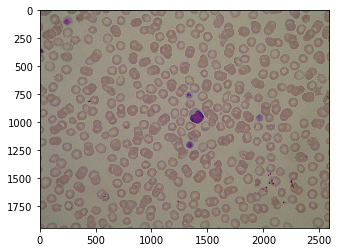

In [7]:
sample_idx = 50
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

imshow(data.asnumpy(), cmap='Blues')
print("Data type: {}".format(data.dtype))
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.synsets[label]))

### Testing Data

First we need to remove the test data that we will use for testing the classifier later from the training data folder. We remove these images before the training so that the classifier does not learn them during training. The following cell provides the function to move the test data to the **model/data/test** folder: 

In [8]:
def remove_testing():
    """ Removes the testing images from the dataset. """

    for img in testData:
        original = trainDataDir+img
        destination = testDataDir+img
        pathlib.Path(original).rename(destination)
        print(original + " moved to " + destination)

### Augmentation


In [9]:
training_transformer = transforms.Compose([
    transforms.Resize(size=224, keep_ratio=True),
    transforms.CenterCrop(128),
    transforms.RandomFlipLeftRight(),
    transforms.RandomColorJitter(contrast=jitter_param),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [10]:
train_loader = gluon.data.DataLoader(train_dataset.transform_first(training_transformer),
                                     batch_size=batch_size,
                                     shuffle=True)

In [11]:
def show_batch(batch, columns=2, fig_size=(9, 5), pad=1):
    labels = batch[1].asnumpy()
    batch = batch[0] / 2 + 0.5     # unnormalize
    batch = np.clip(batch.asnumpy(), 0, 1) # clip values
    size = batch.shape[0]
    rows = int(size / columns)
    fig, axes = plt.subplots(rows, columns, figsize=fig_size)
    for ax, img, label in zip(axes.flatten(), batch, labels):
        ax.imshow(np.transpose(img, (1, 2, 0)))
        ax.set(title=f"Label: {label}")
    fig.tight_layout(h_pad=pad, w_pad=pad)
    plt.show()

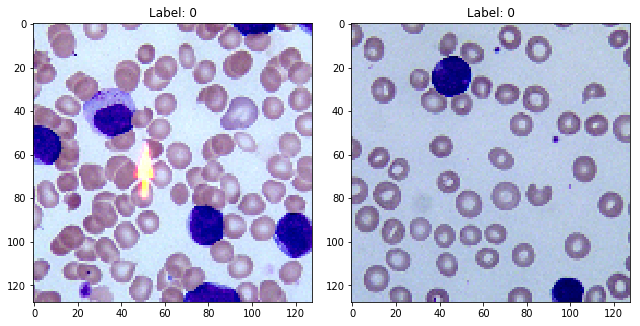

In [12]:
for batch in train_loader:
    a = batch
show_batch(a)